In [1]:
import os
import pickle
import numpy as np

from algos import *
from infect import infect
from sbm import SBM

In [2]:


def iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method, dataset='sbm'):
    name = f"{dataset}N{N}_M{M}_SIM{num_sims}_step{time_steps}_q0{q0}_q1{q1}_p0{p0}_p1{p1}{method}graphs.pkl"
    if not os.path.isfile(name):
        print('Generating synthetic dataset!')
        Gs = np.zeros((num_sims, N, N))
        Communities = {}
        Individuals = {}
        
        if dataset == 'sbm':
            for i in range(num_sims):
                Gs[i] = SBM(N, M, q0, q1)
                communities = [N // M] * M
                for j in range(N % M):
                    communities[j] += 1
                Communities[i] = communities
                Individuals[i] = infect(Gs[i], p0, p1, time_steps)
        elif dataset == 'iid':
            # Assuming all individuals are in one community for IID
            for i in range(num_sims):
                
                Communities[i] = [N]
                Individuals[i] = np.random.rand(N) < p0
        
        data = {'graph': Gs, 'communities': Communities, 'individuals': Individuals}
        # with open(name, 'wb') as file:
        #     pickle.dump(data, file)
        # print('Dataset generated!')
    
    # data = {}
    # if os.path.isfile(name):
    #     with open(name, 'rb') as file:
    #         data = pickle.load(file)
    #     print('Data loaded!')
    
    # Statistics initialization
    total_positive = 0
    total_communities_infected = 0
    total_individuals_in_infected_communities = 0
    total_individuals_possible = 0
    total_tests = 0
    total_stages = 0

    for i in range(num_sims):
        G = data['graph'][i]
        communities = data['communities'][i]
        individuals = data['individuals'][i]

        # calc init number of infected individuals
        positive_count = np.sum(individuals)
        total_positive += positive_count

        # calc communities w/ at least one infection
        start_index = 0
        infected_communities = []
        for size in communities:
            end_index = start_index + size
            if np.any(individuals[start_index:end_index]):  
                infected_communities.append(True)
                total_individuals_in_infected_communities += np.sum(individuals[start_index:end_index])  
            else:
                infected_communities.append(False)
            total_individuals_possible += size  
            start_index = end_index  

        total_communities_infected += sum(infected_communities)


        if method == 'binary_splitting':
            #print(individuals)
            num_tests, num_stages, st = binary_splitting(individuals.astype(int))
            #print(st)
        elif method == 'Qtesting1':
            num_tests, num_stages = Qtesting1(individuals.astype(int))
        elif method == 'Qtesting2':
            num_tests, num_stages = Qtesting2(individuals.astype(int))
        elif method == 'Qtesting1_comm_aware':
            num_tests, num_stages = Qtesting1_comm_aware(individuals.astype(int), communities)
        elif method == 'Qtesting2_comm_aware':
            num_tests, num_stages = Qtesting2_comm_aware(individuals.astype(int), communities)
        else:
            raise ValueError("Unsupported testing method")

        total_tests += num_tests
        total_stages += num_stages

    # Calculate averages and fractions
    fraction_ppl = total_positive / (N * num_sims)
    fraction_family = total_communities_infected / (M * num_sims)
    fraction_ppl_in_family = total_individuals_in_infected_communities / total_individuals_possible if total_individuals_possible > 0 else 0
    num_tests = total_tests / num_sims
    num_stages = total_stages / num_sims

    return fraction_ppl, fraction_family, fraction_ppl_in_family, num_tests, num_stages



<div class="alert alert-warning">
<b>Task 1 </b> 
Plot how the fraction of infected people, the percentage of infected communities, and the average percentage of infected people in each community change with the each setting for the synthetic dataset described in the following table and comment on the results. Average over at least $100$ SBM network realization.     

</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (1,0)  |0.001|[0.05:1]|2|
|   | 16|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 16 |(0.5, 0.2)  | 0.001| [0.05:1]|2     |

[(0.0019140625, 0.015625, 0.0019140625), (0.0026953125, 0.014375, 0.0026953125), (0.0025390625, 0.014375, 0.0025390625), (0.0021875, 0.01, 0.0021875), (0.004140625, 0.014375, 0.004140625), (0.006171875, 0.016875, 0.006171875), (0.00640625, 0.01625, 0.00640625), (0.00484375, 0.010625, 0.00484375), (0.0077734375, 0.015625, 0.0077734375), (0.0070703125, 0.014375, 0.0070703125), (0.009765625, 0.016875, 0.009765625), (0.0109765625, 0.016875, 0.0109765625), (0.0137890625, 0.02, 0.0137890625), (0.016484375, 0.0225, 0.016484375), (0.00828125, 0.010625, 0.00828125), (0.010859375, 0.01375, 0.010859375), (0.0123828125, 0.014375, 0.0123828125), (0.0139453125, 0.015625, 0.0139453125), (0.016015625, 0.016875, 0.016015625), (0.023125, 0.023125, 0.023125)]


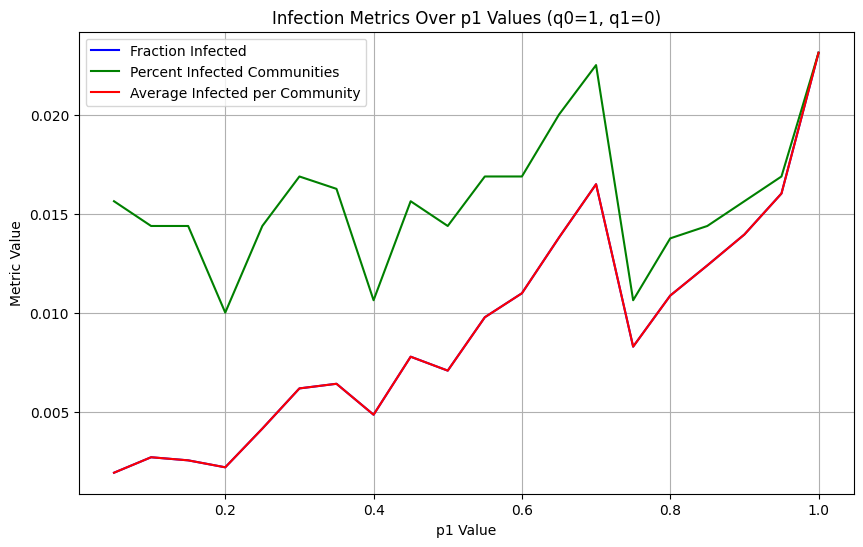

[(0.001953125, 0.021875, 0.001953125), (0.00359375, 0.036875, 0.00359375), (0.008046875, 0.08125, 0.008046875), (0.0101171875, 0.095, 0.0101171875), (0.009765625, 0.0875, 0.009765625), (0.011640625, 0.104375, 0.011640625), (0.013359375, 0.10625, 0.013359375), (0.016171875, 0.129375, 0.016171875), (0.0153515625, 0.119375, 0.0153515625), (0.02421875, 0.1725, 0.02421875), (0.0257421875, 0.184375, 0.0257421875), (0.0209375, 0.136875, 0.0209375), (0.0278125, 0.189375, 0.0278125), (0.0356640625, 0.211875, 0.0356640625), (0.018828125, 0.11375, 0.018828125), (0.030859375, 0.179375, 0.030859375), (0.0197265625, 0.116875, 0.0197265625), (0.036015625, 0.2025, 0.036015625), (0.038515625, 0.195625, 0.038515625), (0.023984375, 0.13125, 0.023984375)]


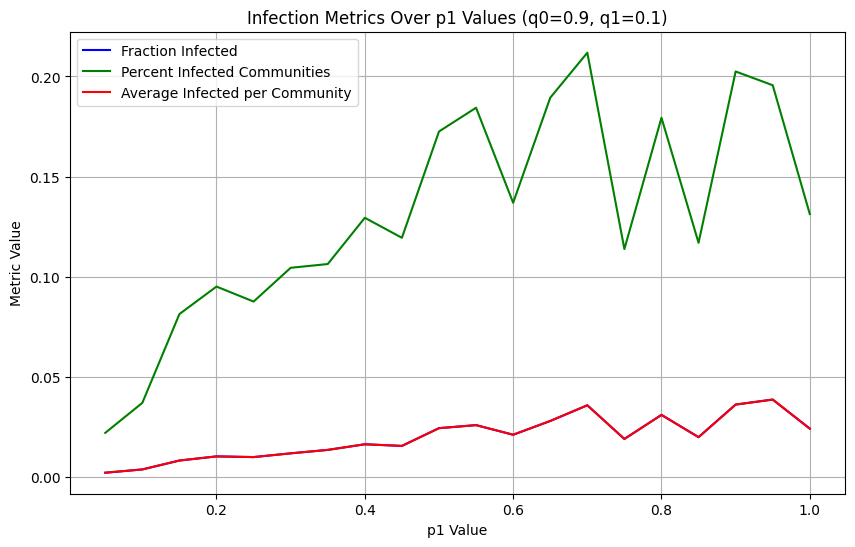

[(0.003359375, 0.045625, 0.003359375), (0.012109375, 0.1425, 0.012109375), (0.0098828125, 0.104375, 0.0098828125), (0.0098828125, 0.098125, 0.0098828125), (0.014609375, 0.133125, 0.014609375), (0.018125, 0.15625, 0.018125), (0.0171484375, 0.15375, 0.0171484375), (0.0166015625, 0.135625, 0.0166015625), (0.042421875, 0.28375, 0.042421875), (0.0269921875, 0.17875, 0.0269921875), (0.0348828125, 0.219375, 0.0348828125), (0.0368359375, 0.223125, 0.0368359375), (0.032265625, 0.19, 0.032265625), (0.044453125, 0.238125, 0.044453125), (0.03296875, 0.178125, 0.03296875), (0.0396484375, 0.21125, 0.0396484375), (0.0462109375, 0.21125, 0.0462109375), (0.0555859375, 0.241875, 0.0555859375), (0.0598046875, 0.2325, 0.0598046875), (0.0649609375, 0.25, 0.0649609375)]


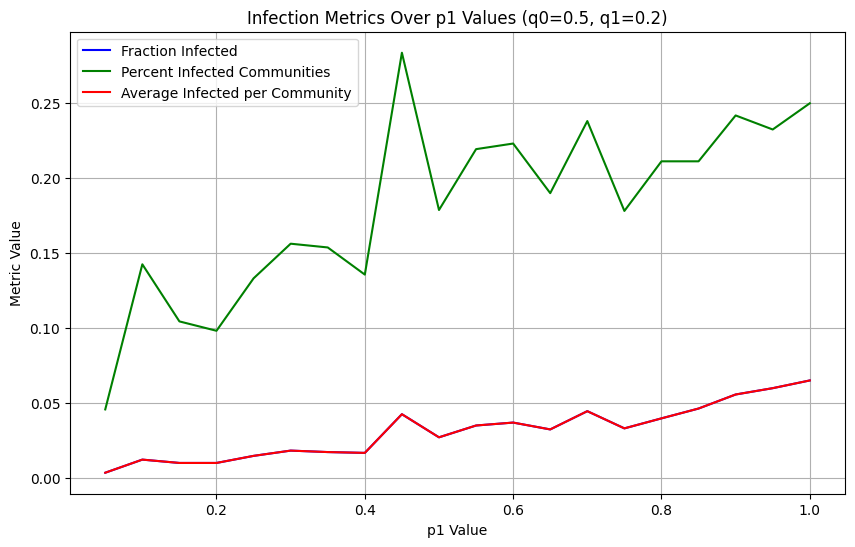

In [45]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_infections(N, M, q0, q1, p0, p1_values, time_steps, realizations):
    results = []
    for p1 in p1_values:
        fraction_infected = []
        percent_infected_communities = []
        avg_infected_per_community = []

        for _ in range(realizations):
            G = SBM(N, M, q0, q1)
            initial_infection = infect(G, p0, p1, time_steps)

            total_infected = np.sum(initial_infection)
            fraction_infected.append(total_infected / N)

            community_sizes = [N // M] * M
            for i in range(N % M):
                community_sizes[i] += 1

            start = 0
            infected_communities = 0
            community_infections = []

            for size in community_sizes:
                end = start + size
                community_infected = np.sum(initial_infection[start:end])
                if community_infected > 0:
                    infected_communities += 1
                community_infections.append(community_infected / size)
                start = end

            percent_infected_communities.append(infected_communities /M)
            avg_infected_per_community.append(np.mean(community_infections))
        
        results.append((np.mean(fraction_infected), np.mean(percent_infected_communities), np.mean(avg_infected_per_community)))

    return results

# Parameters
N = 256
M = 16
q0_q1_pairs = [(1, 0), (0.9, 0.1), (0.5, 0.2)]
p0 = 0.001
p1_values = np.linspace(0.05, 1, 20)  # From 0.05 to 1, evenly spaced 20 values
time_steps = 1
realizations = 100

# Collecting results for plotting
all_fractions = []
all_percent_communities = []
all_avg_communities = []



# Plotting results for each metric
for q0, q1 in q0_q1_pairs:
    results = simulate_infections(N, M, q0, q1, p0, p1_values, time_steps, realizations)
    fractions, percents, avgs = zip(*results)
    print (results)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(p1_values, fractions, label='Fraction Infected', color='blue')
    plt.plot(p1_values, percents, label='Percent Infected Communities', color='green')
    plt.plot(p1_values, avgs, label='Average Infected per Community', color='red')
    plt.title(f'Infection Metrics Over p1 Values (q0={q0}, q1={q1})')
    plt.xlabel('p1 Value')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.show()

Consider $N=256$, and $M=16,64,128$. Use SBM with $q0=1$ and $q1=0$ to generate contact networks (disconnected cliques). For the infection model, use $p_0 = 0.001$ and $p_1 = [0.01:1]$ and the number of infection steps as $2$ . 
Average over 100 SBM network realizations.

<div class="alert alert-warning">
<b>Task 2 </b> 
Provide plots for i.i.d. infection probability that ranges from $p=0.01$ to $p=0.3$, and $N=256$.
Compare the performance of tests $T_1$, $T_2$, and binary output tests. Do you observe a consistent performance? Can you explain your results? 
    
</div>

Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating

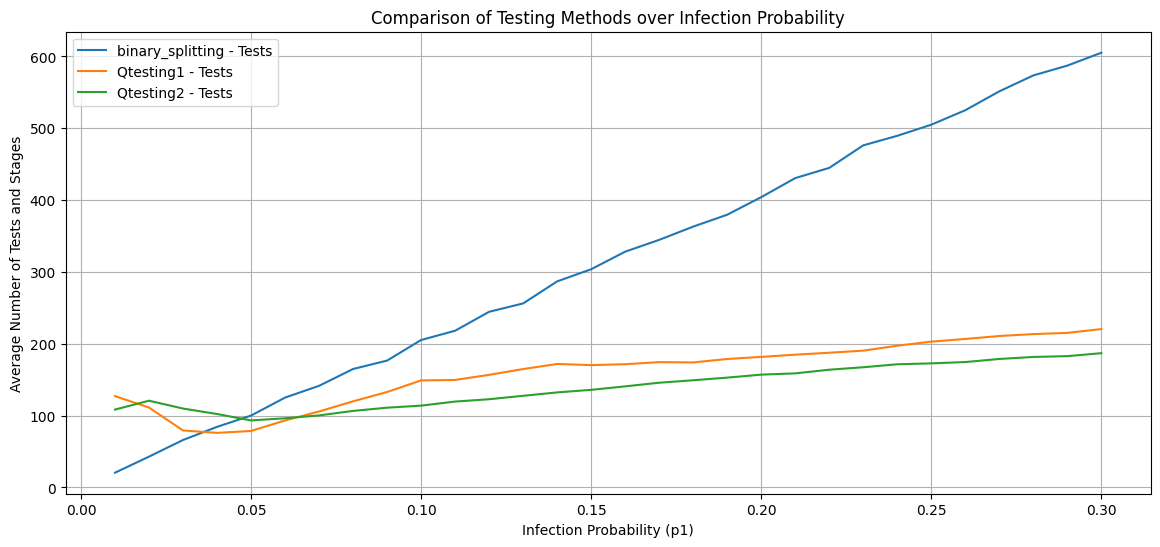

In [3]:
import numpy as np
import matplotlib.pyplot as plt



N = 256
M = 4  
q0, q1 = 0.01, 0.05  
time_steps = 1
num_sims = 100 
p1 = 0.01

p0_values = np.linspace(0.01, 0.3, 30)
methods = ['binary_splitting', 'Qtesting1', 'Qtesting2']

results = {method: {'num_tests': [], 'num_stages': []} for method in methods}

for p0 in p0_values:
    for method in methods:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method, 'iid')
        results[method]['num_tests'].append(num_tests)
        results[method]['num_stages'].append(num_stages)

plt.figure(figsize=(14, 6))
for method in methods:
    plt.plot(p0_values, results[method]['num_tests'], label=f'{method} - Tests')
    #plt.plot(p1_values, results[method]['num_stages'], '--', label=f'{method} - Stages')

plt.title('Comparison of Testing Methods over Infection Probability')
plt.xlabel('Infection Probability (p1)')
plt.ylabel('Average Number of Tests and Stages')
plt.legend()
plt.grid(True)
plt.show()


<div class="alert alert-warning">
<b>Task 3 </b>  
Provide plots that compare the performance of various testing techniques on the Stochastic Block Model (SBM) using the settings outlined in Table 2 and on real data. You may explore additional settings that could reveal significant insights for your custom algorithms. Interpret and explain the results you obtain. Your plots should include: (i) a plot demonstrating how the performance of different testing schemes varies as the family sizes change, (ii)a plot demonstrating how the performance of different testing schemes varies as the infection probability changes and (iii) a plot illustrating how infections concentrate within families in the SBM.
</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (0.9,0.1)  |0.001|[0.05:1]|2|
|   | 64|(1, 0)  | 0.001| [0.05:1]|2     |
|   | 64|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 64|(0.5, 0.2)  | 0.001| [0.05:1]|2     |
|   | 128 |(0.9, 0.1)  | 0.001| [0.05:1]|2     |


In [9]:

p1_values = np.linspace(0.05, 1, 20)  

configurations = [
    (256, 16, (0.9, 0.1)),
    (256, 64, (1, 0)),
    (256, 64, (0.9, 0.1)),
    (256, 64, (0.5, 0.2)),
    (256, 128, (0.9, 0.1))
]


methods = ['binary_splitting', 'Qtesting1', 'Qtesting2', 'Qtesting1_comm_aware', 'Qtesting2_comm_aware']


results = {}

# simulations for each configuration and each p1 value
for N, M, (q0, q1) in configurations:
    results[(N, M, q0, q1)] = {}
    for method in methods:
        results[(N, M, q0, q1)][method] = []

    for p1 in p1_values:
        print(f"Running simulations for N={N}, M={M}, q0={q0}, q1={q1}, p1={p1}")
        for method in methods:
            fraction_ppl, fraction_family, fraction_ppl_in_family, num_tests, num_stages = iter(
                N=N,
                M=M,
                q0=q0,
                q1=q1,
                p0=0.001,
                p1=p1,
                time_steps=2,
                num_sims=10,  
                method=method,
                dataset='sbm'  
            )
            results[(N, M, q0, q1)][method].append({
                'p1': p1,
                'fraction_ppl': fraction_ppl,
                'fraction_family': fraction_family,
                'fraction_ppl_in_family': fraction_ppl_in_family,
                'num_tests': num_tests,
                'num_stages': num_stages
            })




Running simulations for N=256, M=16, q0=0.9, q1=0.1, p1=0.05
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Running simulations for N=256, M=16, q0=0.9, q1=0.1, p1=0.1
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Running simulations for N=256, M=16, q0=0.9, q1=0.1, p1=0.15
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Running simulations for N=256, M=16, q0=0.9, q1=0.1, p1=0.2
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Running simulations for N=256, M=16, q0=0.9, q1=0.1, p1=0.25
Generating synthetic dataset!
Generating synthetic dataset!
Generating synthetic dataset!
Generat

In [10]:
for config, methods_data in results.items():
    print(f"Results for N={config[0]}, M={config[1]}, q0={config[2]}, q1={config[3]}")
    for method, data in methods_data.items():
        print(f"  Method: {method}")
        for result in data:
            print(f"    p1: {result['p1']}, Tests: {result['num_tests']}, Stages: {result['num_stages']}, fractionppl: {result['fraction_ppl']}")


Results for N=256, M=16, q0=0.9, q1=0.1
  Method: binary_splitting
    p1: 0.05, Tests: 35.7, Stages: 35.7, fractionppl: 0.01796875
    p1: 0.1, Tests: 68.4, Stages: 68.4, fractionppl: 0.033984375
    p1: 0.15, Tests: 281.3, Stages: 281.3, fractionppl: 0.1359375
    p1: 0.2, Tests: 95.6, Stages: 95.6, fractionppl: 0.046484375
    p1: 0.25, Tests: 323.4, Stages: 323.4, fractionppl: 0.16015625
    p1: 0.3, Tests: 331.0, Stages: 331.0, fractionppl: 0.16171875
    p1: 0.35, Tests: 293.2, Stages: 293.2, fractionppl: 0.14296875
    p1: 0.39999999999999997, Tests: 1.0, Stages: 1.0, fractionppl: 0.0
    p1: 0.44999999999999996, Tests: 148.1, Stages: 148.1, fractionppl: 0.072265625
    p1: 0.49999999999999994, Tests: 337.3, Stages: 337.3, fractionppl: 0.165234375
    p1: 0.5499999999999999, Tests: 661.1, Stages: 661.1, fractionppl: 0.32109375
    p1: 0.6, Tests: 183.1, Stages: 183.1, fractionppl: 0.0890625
    p1: 0.65, Tests: 348.5, Stages: 348.5, fractionppl: 0.16875
    p1: 0.7, Tests: 773.2

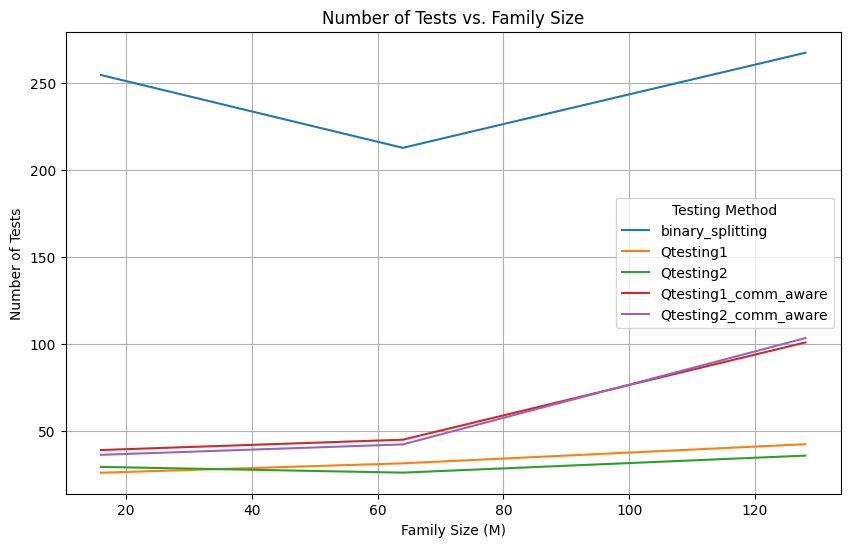

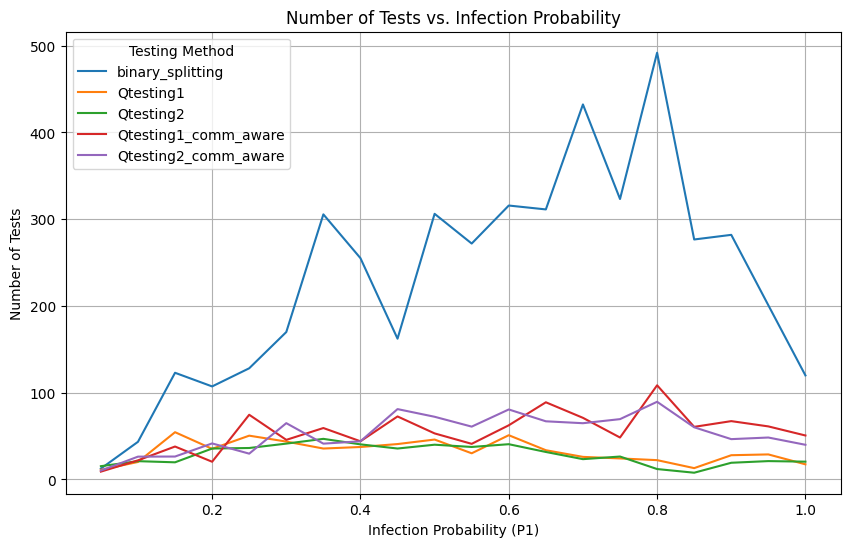

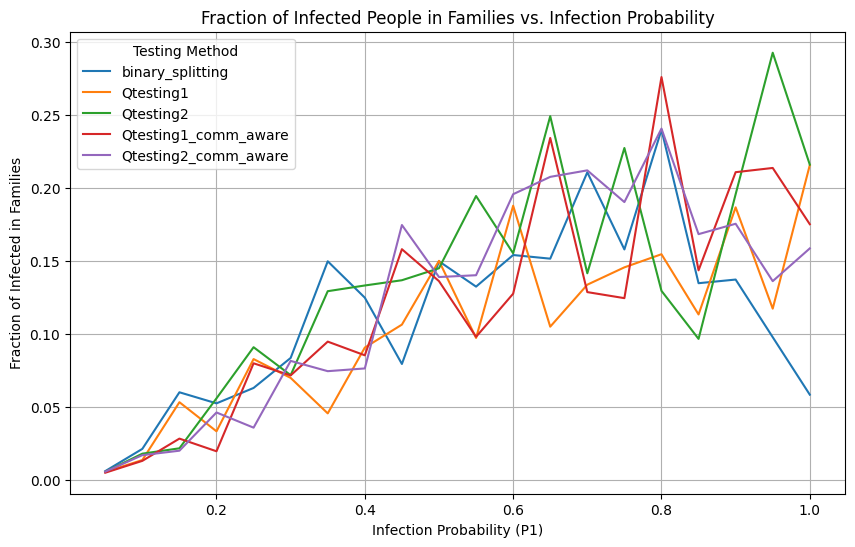

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a helper function to extract data for plotting
def extract_plot_data(results, key):
    plot_data = {'M': [], 'Method': [], 'Value': [], 'P1': []}
    for config, methods in results.items():
        _, M, _, _ = config
        for method, data in methods.items():
            for d in data:
                plot_data['M'].append(M)
                plot_data['Method'].append(method)
                plot_data['Value'].append(d[key])
                plot_data['P1'].append(d['p1'])
    return plot_data

# Plot 1: Performance vs. Family Size
plt.figure(figsize=(10, 6))
family_size_data = extract_plot_data(results, 'num_tests')
sns.lineplot(data=family_size_data, x='M', y='Value', hue='Method',errorbar=None)
plt.title('Number of Tests vs. Family Size')
plt.xlabel('Family Size (M)')
plt.ylabel('Number of Tests')
plt.legend(title='Testing Method')
plt.grid(True)
plt.show()

# Plot 2: Performance vs. Infection Probability
plt.figure(figsize=(10, 6))
infection_prob_data = extract_plot_data(results, 'num_tests')
sns.lineplot(data=infection_prob_data, x='P1', y='Value', hue='Method', errorbar=None)
plt.title('Number of Tests vs. Infection Probability')
plt.xlabel('Infection Probability (P1)')
plt.ylabel('Number of Tests')
plt.legend(title='Testing Method')
plt.grid(True)
plt.show()

# Plot 3: Infections Within Families
plt.figure(figsize=(10, 6))
infection_family_data = extract_plot_data(results, 'fraction_ppl_in_family')
sns.lineplot(data=infection_family_data, x='P1', y='Value', hue='Method', errorbar=None)
plt.title('Fraction of Infected People in Families vs. Infection Probability')
plt.xlabel('Infection Probability (P1)')
plt.ylabel('Fraction of Infected in Families')
plt.legend(title='Testing Method')
plt.grid(True)
plt.show()
